# Chargement des librairies 


In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import scipy as sp ##Utilisation du module permettant de faire la classification supervisée (sp.cluser.hierarchy)
import scipy.cluster.hierarchy as sh
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from numpy import linalg as lg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


# Défintion des fonctions utilitaires


* __CalculateKmeans__ permet d'appliquer l'algorithme des Kmeans sur un jeu de données X , pour un nombre de classe variant entre 2 et KMAX
* Cette fonction retourne un dictionnaire  k=>Inertie intra classe


* __generateSingleDataset__ permet de générer un jeu de données de taille __"size"__ suivant un loi normale de moyenne __"center"__ ,en dimension __"dim"__   et de matrice des variances I(dim) [matrice identité en dimension dim
 
* __generate Popuplation__ permet de générer une popuplation de __"nb_classes"__, chaque classe étant générée par la fonction generateSingleDataset ci dessus
 
    * l'argument plot permet d'afficher ou le non la population ainsi généré lorsqu'on est en dimension 2

In [2]:

def calculateKMeans(X,KMAX,iter=100):
    kmeans_ICC=dict()
    for i in range(1,KMAX):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = iter, n_init = 10, random_state = 0)
        kmeans.fit(X)
        kmeans_ICC[i]=kmeans.inertia_
    return kmeans_ICC
        
    


 
def generateSingleDataset(center,size,dim=2):
    covar=np.identity(dim)
    dataset=np.random.multivariate_normal(size=size, mean=center, cov=covar)
    return dataset




#Dx permet de donner la distance entre les centres des classes
def generatePopulation(nb_classe,plot=False,figsize=(10,10),dx_classe=50,size=100,dim=2):
    data=[]
    
    coef=np.ones(dim)
    
    
    center=np.ones(dim)
    coef_index=0
    previous_center,next_center=np.copy(center),np.copy(center)
    
    for k in range(1,nb_classe+1):
        current_center=np.copy(previous_center)
        current_center[coef_index]=current_center[coef_index]+coef[coef_index]*dx_classe
        next_center[coef_index]=current_center[coef_index]
        if coef_index==(dim-1):
            coef_index=0
            for l in range(0,dim):
                coef[l]=coef[l]+1
            previous_center=np.copy(next_center)
            next_center=np.copy(next_center)
        else :
            coef_index+=1
            
        
        data0=generateSingleDataset(current_center,size,dim)
            
        data.append(data0)
            
    
    
    if plot==True and dim==2:
        plt.figure(figsize = figsize)
        for data0 in data:
            
            plt.scatter([elt[0] for elt in data0],[elt[1] for elt in data0])
        
        plt.show()
    
    dataset=[]
    for data0 in data:
        for value in data0:
            dataset.append(value)
        
    
    
    return np.array(dataset)
            
        
    

## Simulation d'un de jeu de données à 3 classes
### Generation de trois classes en dimension 2 de 50 elements chacune avec une distance interclasse de 5

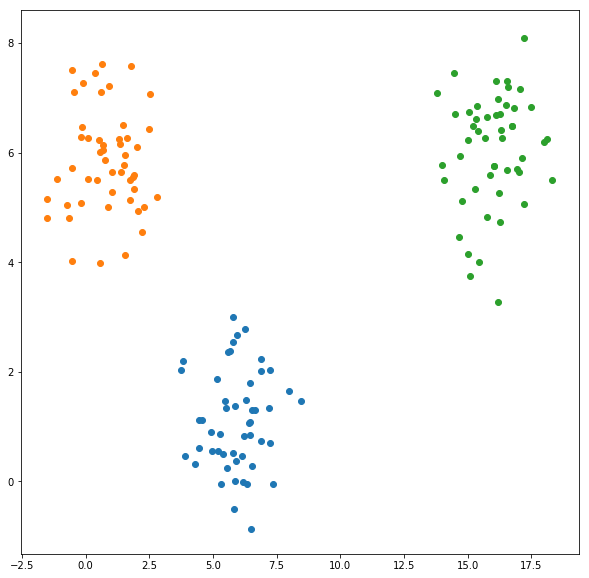

In [3]:




dataset=generatePopulation(3,plot=True,dx_classe=5,size=50,)




# Méthodes implémentées: 
  * __Méthode de ELBOW__ : détermination du K optimal à partir de la plus grande variation de l'inertie intra classe
  * __Méthode de Silhouette__  :Détermination Du K optimal à partir des valeurs moyennes de silhouette de classes à associées à chaque nombre de classes
  *  __Critère F(k)__ : Détermination de k à partir du calcul de la fonction F(k) pour chaque nombre de classes
  
 ### __NB__ : Chacune des ces méthodes est implémentée par une fonction qui prend en argument un jeu de données X, un nombre maximal de classes K_MAX et retourne le nombre optimal de classes pour le jeu de données considéréé (k variant entre 1 et K_MAX)

# 1. Méthode de ELBOW
 #### Le point de Elbow est calculé comme le coude du graphe (nombre de classes |--> Inertie). 
 #### Dans l'implémentation , ce coude correspond à la valeur de l'angle sur la précédent la premier d'angle dans l'intervalle [178,180] en dégrés
 #### L'inertie sera normalisée pour garantir la vraissemblance des angles ainsi calculés

In [82]:
def elbowCalculation(X,KMAX,plot=True,iter=100):
    result=calculateKMeans(X,KMAX,iter) ## Calcul de l'inertie pour chaque valeur de K par la méthode calculateKmeans définie plus haut
    
    angles=dict()
    
    ##Détermination de l'ordre de grandeur pour normaliser
    
    scale=10**(round(np.math.log(max(result.values()),10)))
    for k in range(2,KMAX-1):
        
        a=np.array([k-1,result[k-1]/scale])
        b=np.array([k,result[k]/scale])
        c=np.array([k+1,result[k+1]/scale])
        

      
        ba = a - b
        bc = c - b

        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        
        ang = np.math.degrees(np.math.atan2(c[1]-b[1], c[0]-b[0]) - np.math.atan2(a[1]-b[1], a[0]-b[0]))
        
        
        angles[k]=abs(np.math.degrees(angle))
        
    
    
    
    
    
    
    optimal_k=1
    print(angles)
    for k in range(2,MAX):
        if angles[k]<=180 and 180-angles[k]<1.5:
            optimal_k=k-1
            break
    
  
    
    if plot==True:
        plt.figure(figsize = (10, 10))
        plt.plot(result.keys(),result.values())
        plt.show()
    
    
    return optimal_k
    
    

## Test avec le Dataset simulé

{2: 133.38846497113713, 3: 172.41264603107663, 4: 178.75748961218798, 5: 176.14527951362916, 6: 177.59150202853405, 7: 178.30487670803222, 8: 179.8213213511789, 9: 178.88652993561183, 10: 179.6542030062614, 11: 179.9993697276632, 12: 179.99959426613816}


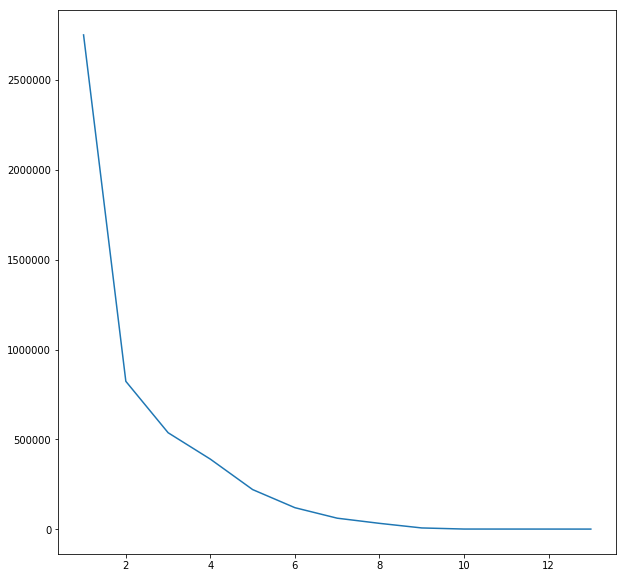

K_OPTIMAL :  3


In [83]:
print ("K_OPTIMAL : ",elbowCalculation(dataset,14))



# 2. Méthode Silhouette

In [6]:
def silhouetteCalculation(X,KMAX,plot=True,iter=100): #Retourne le k optimal et affiche la courbe des silhouettes si plot=True
    silhouette_avg_map=dict()
    for n_clusters in range(2,KMAX):
        clusterer = KMeans(n_clusters=n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        clusterer.fit(X)
        cluster_labels = clusterer.predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_map[n_clusters]=silhouette_avg
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
    max_silhouette=max(silhouette_avg_map.values())
    optimal_k = [k for k, v in silhouette_avg_map.items() if v == max_silhouette] # getting all keys containing the `maximum`
    if plot==True:
        plt.figure(figsize = (10, 10))
        plt.plot(range(2, KMAX),silhouette_avg_map.values() )
        plt.title('Méthode Silhouette')
        plt.xlabel('Nombre de classes')
        plt.ylabel('Silhouette')
        plt.show()

    
        
    return optimal_k[0]

In [7]:
## Test avec le Dataset simulé

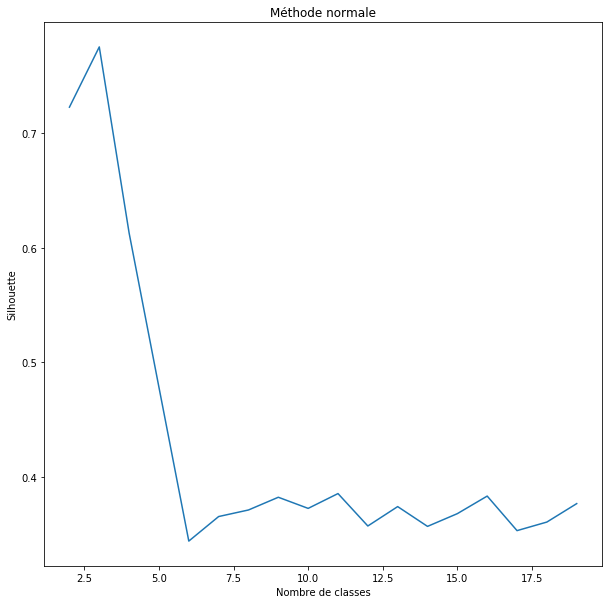

K_OPTIMAL :  3


In [8]:
print("K_OPTIMAL : " ,silhouetteCalculation(dataset,20))

# 3. Methode du critère F(K)

In [9]:
def fCriteriaCalculation(X,KMAX,plot=True,iter=100):
   
    kmeans_ICC=calculateKMeans(X,KMAX,iter)
    F=dict()
    alpha=dict()
    p=X.shape[1]
    
    for K in kmeans_ICC.keys():
        if K==1:
            F[K]=1
            alpha[K]=1
        else :
            if (K==2 and p>1) :
                alpha[K]=1-3/(4*p)
           
            elif(K>2 and p>1):
                alpha[K]=alpha[K-1]+(1-alpha[K-1])/6
            
            F[K]=kmeans_ICC[K]/(alpha[K]*kmeans_ICC[K-1])
            

    

        
    min_value = min(F.values())  # minimum value
    optimal_k = [k for k, v in F.items() if v == min_value] # getting all keys containing the `maximum`
    if(plot):
        plt.figure(figsize = (10, 10))
        plt.plot(kmeans_ICC.keys(),F.values() )
        plt.title('Méthode F(K)')
        plt.xlabel('Nombre de classes')
        plt.ylabel('')
        plt.show()

    return optimal_k[0]

    
    

        


## Test avec le Dataset simulé

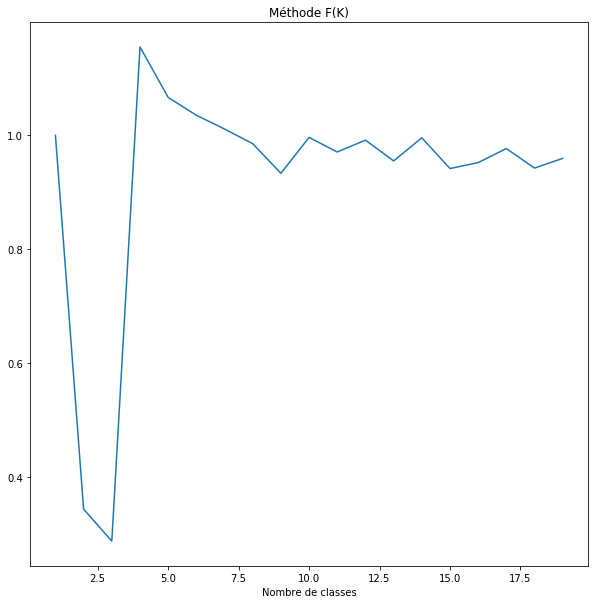

K_OPTIMAL : 3


In [10]:
print("K_OPTIMAL :",fCriteriaCalculation(dataset,20))

# 4. Comparaison des méthodes

* Nous allons faire varier le nombre de classes générées dans le jeu de données entre 2 et 10 . ainsi que la taille des données par classe sera fixée à 100
* la distance entre les classes (distance entre les centres) sera fixée à 10 pour garantir la séparation des classes, un tableau(comparatif) affichera les valeurs optimales estimées par chacune des méthodes ci-dessus implémentées
    

## Aperçu du jeu de données 


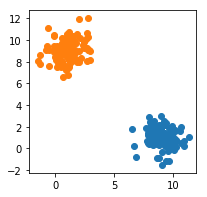

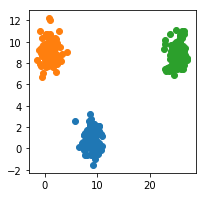

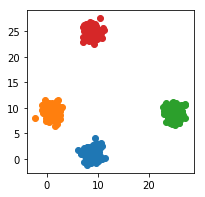

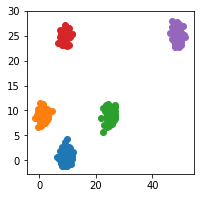

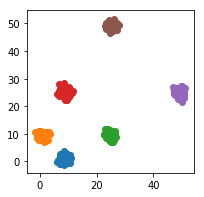

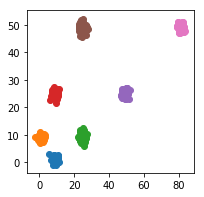

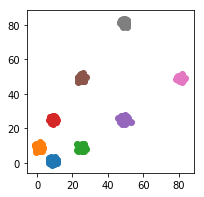

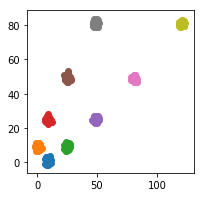

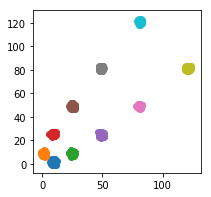

In [70]:
MAX=10
KMAX=20
datasets=dict()
for k in range(2,MAX+1):
    dataset=generatePopulation(k,size=100,dx_classe=8,plot=True,figsize=(3,3))
    datasets[k]=dataset

# Création de la table de comparaison et calcul de précision


In [12]:

#compareTable=[];

{2: 147.98618900576687, 3: 179.98846848306817, 4: 179.88420167310562, 5: 179.93351355305774, 6: 179.88054609810223, 7: 179.9672495588113, 8: 179.9925181494594, 9: 179.9986252022542, 10: 179.98230599562527, 11: 179.99541823146208, 12: 179.97276732681107, 13: 179.9911818264228, 14: 179.9891245082862, 15: 179.982662724115, 16: 179.975091851657, 17: 179.99822499884007, 18: 179.98939308630028}
{2: 168.0546421894707, 3: 176.3487333032449, 4: 179.9945684302872, 5: 179.99652490212694, 6: 179.98422234767511, 7: 179.99914730022257, 8: 179.99142708046406, 9: 179.99580079089299, 10: 179.9992607049812, 11: 179.99823621398787, 12: 179.99516480817167, 13: 179.9993300895674, 14: 179.99879848655894, 15: 179.99814486243613, 16: 179.99915047591577, 17: 179.99951435962086, 18: 179.99797230861995}
{2: 177.93483746901137, 3: 169.49974927992267, 4: 176.39268118690953, 5: 179.99497311547822, 6: 179.99861255004996, 7: 179.9978042038937, 8: 179.98721225237404, 9: 179.99983886054338, 10: 179.99744240393807, 11: 

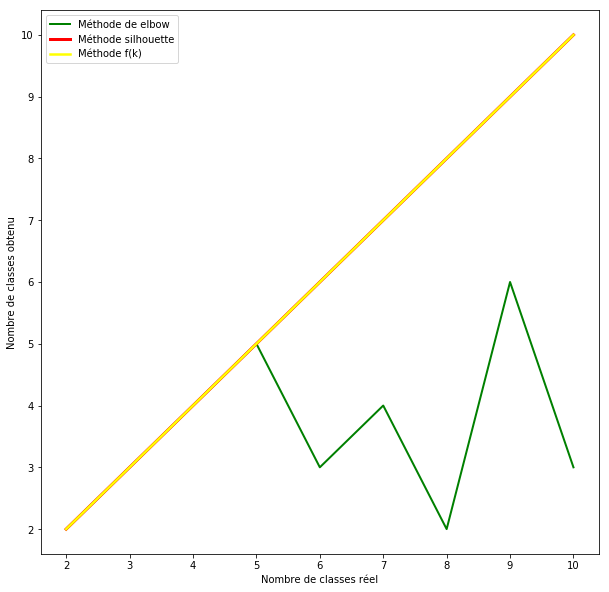

,ELBOW,Silhouette,F(k)
Nombre de classes,,,
2,2,2,2
3,3,3,3
4,4,4,4
5,5,5,5
6,3,6,6
7,4,7,7
8,2,8,8
9,6,9,9
10,3,10,10


In [84]:

def compare(nbClasses):
    datasets=dict()
    for k in range(2,nbClasses+1):
        dataset=generatePopulation(k,size=100,dx_classe=8,plot=False)
        datasets[k]=dataset
    k_interval=range(2,nbClasses+1)

    valElbow=[]
    valSilh= []
    valfCriteria=[]
    for k in k_interval:
        dataset=datasets[k]
        valElbow.append(elbowCalculation(dataset,KMAX,plot=False))
        valSilh.append(silhouetteCalculation(dataset,KMAX,plot=False))
        valfCriteria.append(fCriteriaCalculation(dataset,KMAX,plot=False))
    compareTable=pd.DataFrame({'Nombre de classes':k_interval, 'ELBOW':valElbow, 'Silhouette':valSilh,'F(k)':valfCriteria})
    compareTable.set_index("Nombre de classes",inplace=True)

    confElbow=accuracy_score(k_interval,valElbow)
    confSilh=accuracy_score(k_interval,valSilh)
    confF=accuracy_score(k_interval,valfCriteria)
    print("Précision des différentes méthodes")
    print("\nMethode de ELBOW : ",confElbow," \nMéthode Silhouette : ", confSilh,"\nMéthode F(k):",confF)
    
    plt.figure(figsize=(10,10))
   
    plt.plot(k_interval,valElbow,color="green",label="Méthode de elbow" ,linewidth=2)
    plt.plot(k_interval,valSilh,color="red" , label="Méthode silhouette" ,linewidth=3)
    plt.plot(k_interval,valfCriteria,color="yellow" , label="Méthode f(k)", linewidth=2.5)
    plt.xlabel("Nombre de classes réel")
    plt.ylabel("Nombre de classes obtenu")
    plt.legend()
    plt.show()
    
    return compareTable

    
compare(MAX)

## Faisons maintenant varier le nombre de classe jusqu'a 20

Ordre de grandeur: 10000
Ordre de grandeur: 100000
Ordre de grandeur: 100000
Ordre de grandeur: 100000
Ordre de grandeur: 100000
Ordre de grandeur: 1000000
Ordre de grandeur: 1000000
Ordre de grandeur: 1000000
Ordre de grandeur: 1000000
Ordre de grandeur: 10000000
Ordre de grandeur: 10000000
Ordre de grandeur: 10000000
Ordre de grandeur: 10000000
Ordre de grandeur: 10000000
Ordre de grandeur: 10000000
Ordre de grandeur: 100000000
Ordre de grandeur: 100000000
Ordre de grandeur: 100000000
Ordre de grandeur: 100000000
Précision des différentes méthodes

Methode de ELBOW :  0.2631578947368421  
Méthode Silhouette :  0.9473684210526315 
Méthode F(k): 0.5263157894736842


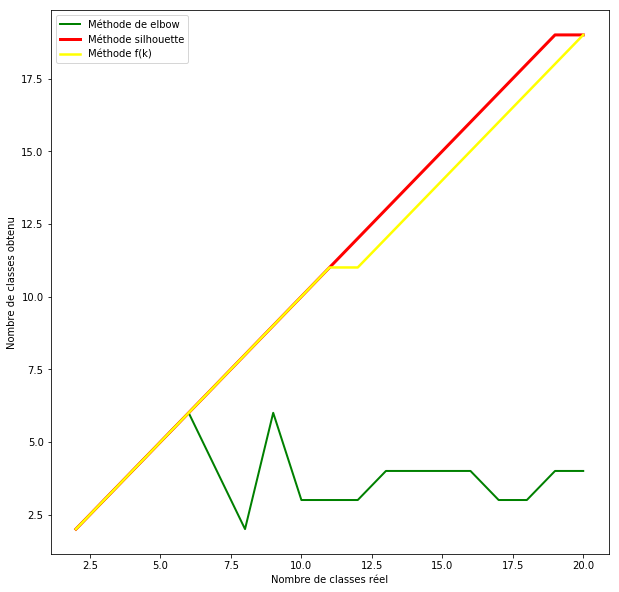

,Nombre de classes,ELBOW,Silhouette,F(k)
0,2,2,2,2
1,3,3,3,3
2,4,4,4,4
3,5,5,5,5
4,6,6,6,6
5,7,4,7,7
6,8,2,8,8
7,9,6,9,9
8,10,3,10,10
9,11,3,11,11


In [59]:
compare(20)